In [1]:
from pylab import *
import numpy as np
import matplotlib, pylab
from dcll.npamlib import plotLIF, sigmoid, spikes_to_evlist
from dcll.pytorch_libdcll import *
from dcll.load_dvsgestures_sparse import *

matplotlib.rcParams['text.usetex']=False
matplotlib.rcParams['savefig.dpi']=400.
matplotlib.rcParams['font.size']=14.0
matplotlib.rcParams['figure.figsize']=(5.0,3.5)
matplotlib.rcParams['axes.formatter.limits']=[-10,10]
matplotlib.rcParams['axes.labelsize']= 14.
matplotlib.rcParams['figure.subplot.bottom'] = .2
matplotlib.rcParams['figure.subplot.left'] = .2       

In [2]:
Nlayers = 3
directory = "../Paper_results/synthetic/"

In [3]:
do_ = [np.load(directory+'do1.npy'), np.load(directory+'do2.npy'), np.load(directory+'do3.npy')]
loss = np.load(directory+'loss.npy')
dwt = np.array(np.load(directory+'dwt.npy'))
deps = np.array(np.load(directory+'deps.npy')).squeeze()
target = np.load(directory+'target.npy')


In [4]:
layer=2
nrn=2
innrn=3

In [5]:
sinput = np.array([d[0] for d in do_[layer-1]]).squeeze()
soutput = np.array([d[0] for d in do_[layer]]).squeeze()
softvoutput = np.array([d[2] for d in do_[layer]]).squeeze()
pvoutput= np.array([d[1] for d in do_[layer]]).squeeze()

pvoutput0= np.array([d[1] for d in do_[0]]).squeeze()
pvoutput1= np.array([d[1] for d in do_[1]]).squeeze()
pvoutput2= np.array([d[1] for d in do_[2]]).squeeze()

voutput = np.array([d[3] for d in do_[layer]]).squeeze()
loss_iter = np.array([d[3] for d in do_[layer]]).squeeze()
target = np.array([d.squeeze() for d in target])

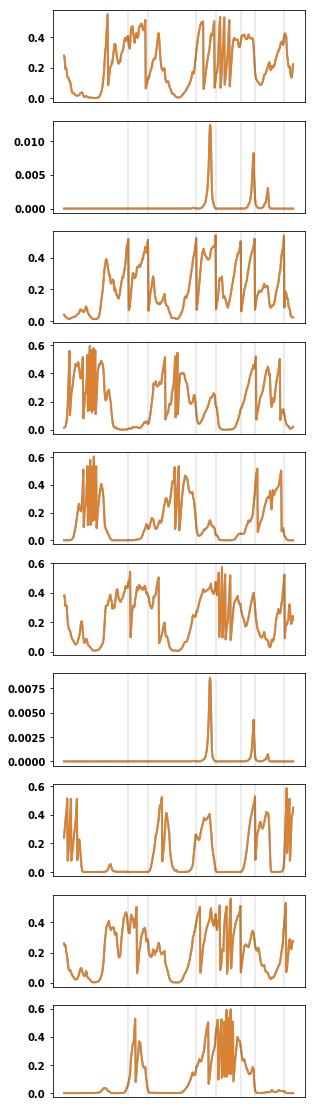

In [6]:
figure(figsize=(5,20))
for nrn_ in range(10):
    subplot(10,1,nrn_+1)
    plot(torch.nn.Sigmoid()(torch.Tensor(voutput[:,nrn_])).numpy(), linewidth=2, alpha=.8)
    plot(softvoutput[:,nrn_], linewidth=2, alpha=.8)
    xticks([])
    for t in np.where(soutput[:, nrn]==1)[0]:
        axvline(t, color='k', alpha=.1)

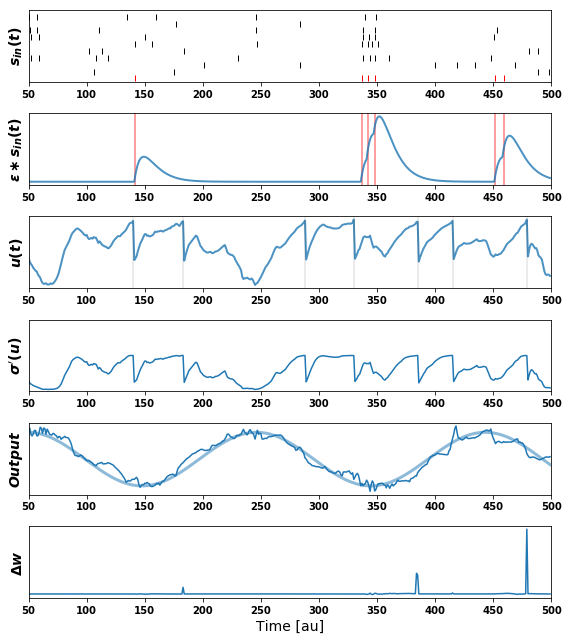

In [7]:
fig = plt.figure(figsize=(8,9))
k=1
xmin=50
xmax=500

subplot(6,1,k)
t,n = spikes_to_evlist(sinput[:,innrn+1:innrn+10])
plot(t, n+1, 'k|', markersize=6)
t,n = spikes_to_evlist(sinput[:,innrn:innrn+1])
plot(t, n, 'r|', markersize=6)
xlim(xmin,xmax)
ylim([-.5,10])
yticks([])
ylabel('$s_{in}(t)$')
k+=1

subplot(6,1,k)
for tt in t:
    axvline(tt, color='r', alpha=.5)
plot(deps[:,innrn], linewidth=2, alpha=.8)
xlim(xmin,xmax)
yticks([])
ylabel('$\epsilon \\ast s_{in}(t)$')

k+=1

subplot(6,1,k)
plot(voutput[:,nrn], linewidth=2, alpha=.8)
for t in np.where(soutput[:, nrn]==1)[0]:
    axvline(t, color='k', alpha=.1)
xlim(xmin,xmax)
yticks([])
ylabel('$u(t)$')
k+=1

subplot(6,1,k)
x = voutput[:, nrn]
plot(sigmoid(x)*(1-sigmoid(x)))
xlim(xmin,xmax)
ylim(0,.5)
#yticks([0,.5],[0,.5])
ylabel('$\sigma\'(u)$')
yticks([])

k+=1

ax1=subplot(6,1,k)
#Get rid of zeros due to dropout


ax1.plot(pvoutput2, color='C0')
ax1.plot(target[2], color='C0', linewidth = 3, alpha=.5)

# ax1.plot(pvoutput1, color='C1')
# ax1.plot(target[1], color='C1', linewidth = 3, alpha=.5)

# ax1.plot(pvoutput2, color='C2')
# ax1.plot(target[2], color='C2', linewidth = 3, alpha=.5)
yticks([])
ylabel('$Output$')
xlim(xmin,xmax)

k+=1

subplot(6,1,k)
plot(dwt[:,nrn,innrn])
xlim(xmin,xmax)
yticks([])
ylabel('$\Delta w$')

k+=1

xlabel('Time [au]')

tight_layout()
savefig(directory+'/snapshot.png', dpi=200)

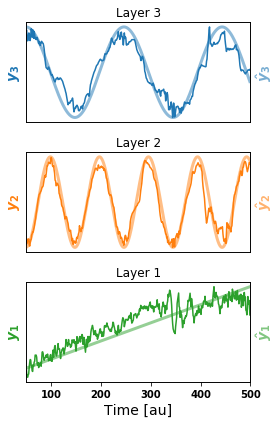

In [8]:
fig = plt.figure(figsize=(4,6))

ax1 = subplot(3,1,1)
ax1.plot(pvoutput2, color='C0')
ax1t = ax1.twinx()
ax1t.plot(target[2], color='C0', linewidth = 3, alpha=.5)
ax1.set_xticks([])
ax1.set_xlim(xmin,xmax)
ax1.set_ylabel('$y_3$', color='C0')
ax1.set_title('Layer 3')
ax1.set_yticks([])
ax1t.set_yticks([])
ax1t.set_ylabel('$\hat{y}_3$', color='C0', alpha=.6)

ax2 = subplot(3,1,2)
ax2.plot(pvoutput1, color='C1')
ax2t = ax2.twinx()
ax2t.plot(target[1], color='C1', linewidth = 3, alpha=.5)
ax2.set_xticks([])
ax2.set_xlim(xmin,xmax)
ax2.set_ylabel('$y_2$', color='C1')
ax2.set_yticks([])
ax2t.set_yticks([])
ax2t.set_ylabel('$\hat{y}_2$', color='C1', alpha=.6)

ax2.set_title('Layer 2')


ax3 = subplot(3,1,3)
ax3.plot(pvoutput0, color='C2')
ax3t = ax3.twinx()
ax3t.plot(target[0], color='C2', linewidth = 3, alpha=.5)
title('Layer 1')
xlim(xmin,xmax)
ax3.set_ylabel('$y_1$', color='C2')
ax3.set_yticks([])
ax3t.set_yticks([])
ax3t.set_ylabel('$\hat{y}_1$', color='C2', alpha=.6)

ax3.set_xlabel('Time [au]')

# Plot 1:


# just align the last column of axes:
fig.align_ylabels()
plt.tight_layout()

savefig(directory+'/layer_outs.png', dpi=200)